# Análisis Exploratorio Post-Consolidación
## Amazon Customer Reviews Dataset

Este notebook analiza el dataset consolidado para entender mejor nuestros datos y preparar la fase de modelado.
  

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import warnings

# Ignorar warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
%matplotlib inline

# Mostrar todas las columnas en los DataFrames
pd.set_option('display.max_columns', None)

In [3]:
# Cargar el dataset consolidado
df = pd.read_csv('../data/processed/consolidated_reviews.csv')
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (67992, 14)


,id,name,brand,categories,reviews.id,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,text_length,sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,143,positive
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman,75,positive
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,131,positive
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,593,positive
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-12 00:00:00+00:00,True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,613,positive


 ## 1. Análisis General
 ### 1.1 Estadísticas Básicas

In [4]:
# Información general del dataset
print("\nInformación del Dataset:")
df.info()

print("\nEstadísticas Descriptivas:")
df.describe(include='all')


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67992 entries, 0 to 67991
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   67992 non-null  object 
 1   name                 61232 non-null  object 
 2   brand                67992 non-null  object 
 3   categories           67992 non-null  object 
 4   reviews.id           71 non-null     float64
 5   reviews.date         67808 non-null  object 
 6   reviews.doRecommend  55152 non-null  object 
 7   reviews.numHelpful   67992 non-null  float64
 8   reviews.rating       67992 non-null  float64
 9   reviews.text         67991 non-null  object 
 10  reviews.title        67973 non-null  object 
 11  reviews.username     67979 non-null  object 
 12  text_length          67992 non-null  int64  
 13  sentiment            67992 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 7.3+ MB

E

,id,name,brand,categories,reviews.id,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,text_length,sentiment
count,67992,61232,67992,67992,7.100000e+01,67808,55152,67992.000000,67992.000000,67991,67973,67979,67992.000000,67992
unique,92,125,8,111,NaN,1330,2,NaN,NaN,46909,25788,37570,NaN,3
top,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",NaN,2017-01-23 00:00:00+00:00,True,NaN,NaN,good,Five Stars,ByAmazon Customer,NaN,positive
freq,10966,10966,49854,10966,NaN,1314,52800,NaN,NaN,61,4100,889,NaN,62547
mean,NaN,NaN,NaN,NaN,1.837463e+08,NaN,NaN,0.464805,4.553859,NaN,NaN,NaN,150.242705,NaN
std,NaN,NaN,NaN,NaN,2.371858e+07,NaN,NaN,10.447004,0.831007,NaN,NaN,NaN,196.710631,NaN
min,NaN,NaN,NaN,NaN,1.082112e+08,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1.843760e+08,NaN,NaN,0.000000,4.000000,NaN,NaN,NaN,64.000000,NaN
50%,NaN,NaN,NaN,NaN,1.880757e+08,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN,99.000000,NaN
75%,NaN,NaN,NaN,NaN,1.987126e+08,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN,175.000000,NaN


### 1.2 Análisis de Valores Faltantes

Análisis de Valores Faltantes:


,Missing Values,Percentage
reviews.id,67921,99.895576
reviews.doRecommend,12840,18.884575
name,6760,9.942346
reviews.date,184,0.270620
reviews.title,19,0.027944
reviews.username,13,0.019120
reviews.text,1,0.001471
id,0,0.000000
brand,0,0.000000
categories,0,0.000000


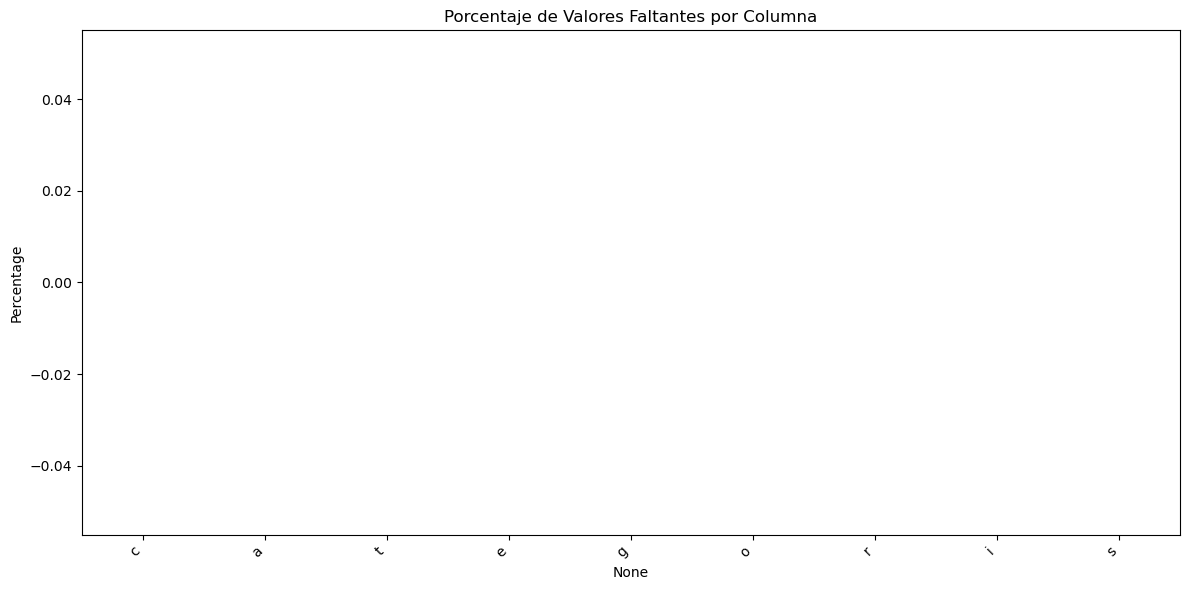

In [5]:
# Visualizar valores faltantes
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
}).sort_values('Percentage', ascending=False)

print("Análisis de Valores Faltantes:")
display(missing_df)

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Percentage', data=missing_df)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.tight_layout()
plt.show()

## 2. Análisis de Sentimiento
### 2.1 Distribución de Ratings y Sentimiento

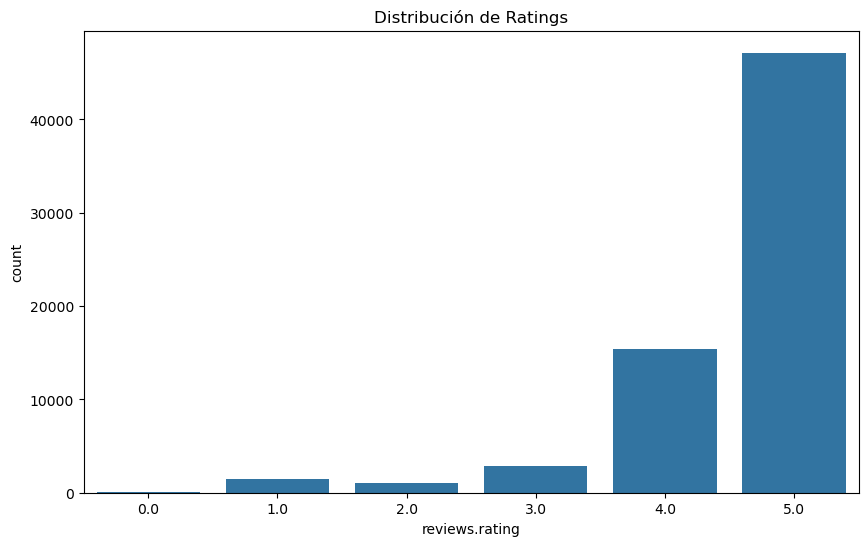

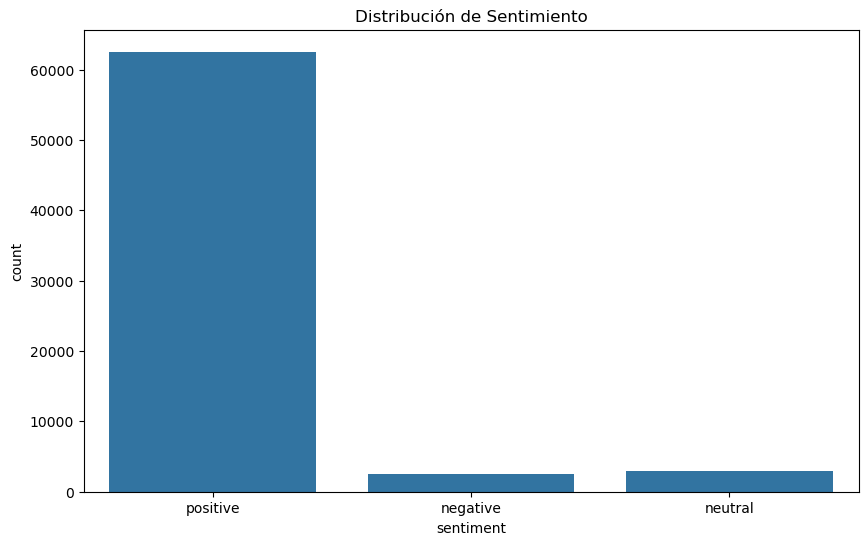

In [6]:
# Distribución de ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='reviews.rating')
plt.title('Distribución de Ratings')
plt.show()

# Distribución de sentimiento 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Distribución de Sentimiento')
plt.show()

### 2.2 Análisis de Texto

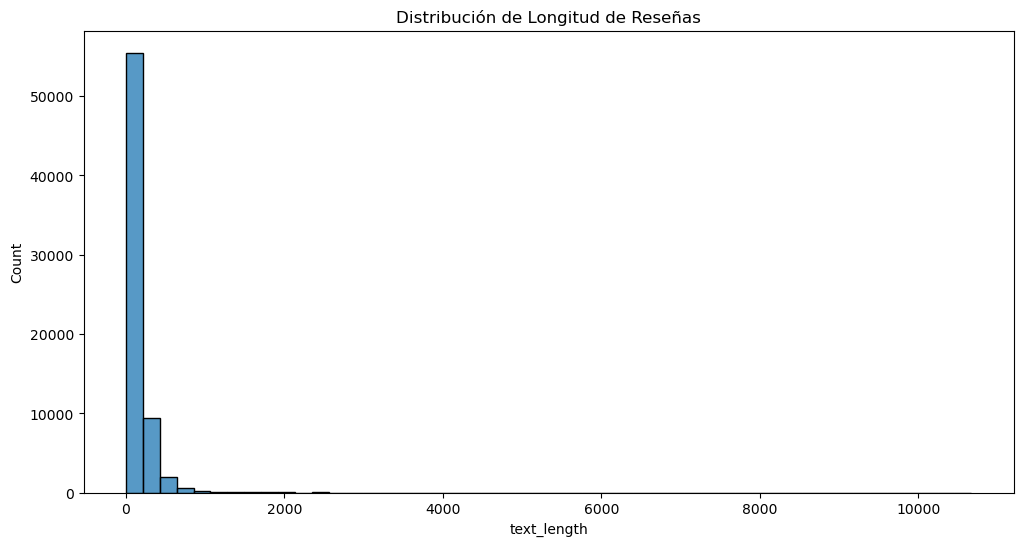

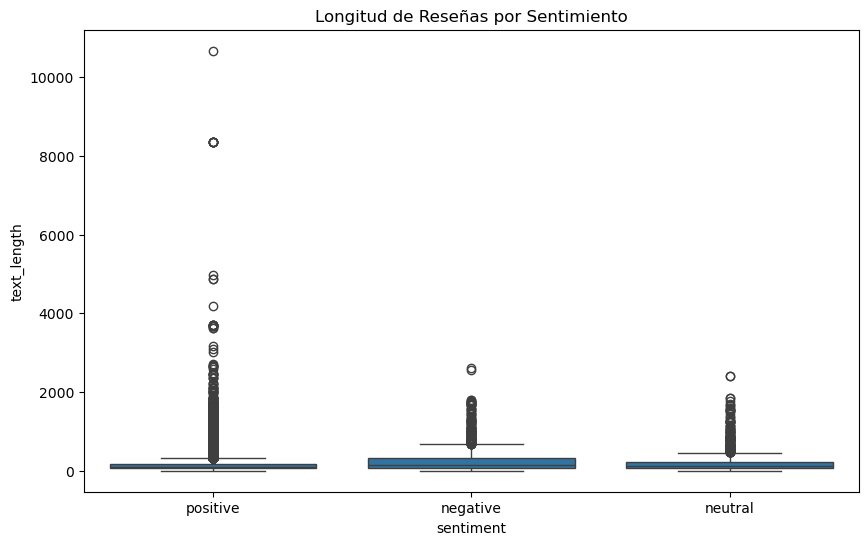

In [7]:
# Distribución de longitud de reseñas
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribución de Longitud de Reseñas')
plt.show()

# Longitud promedio por sentimiento 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='text_length')
plt.title('Longitud de Reseñas por Sentimiento')
plt.show()

## 3. Análisis por Categorías

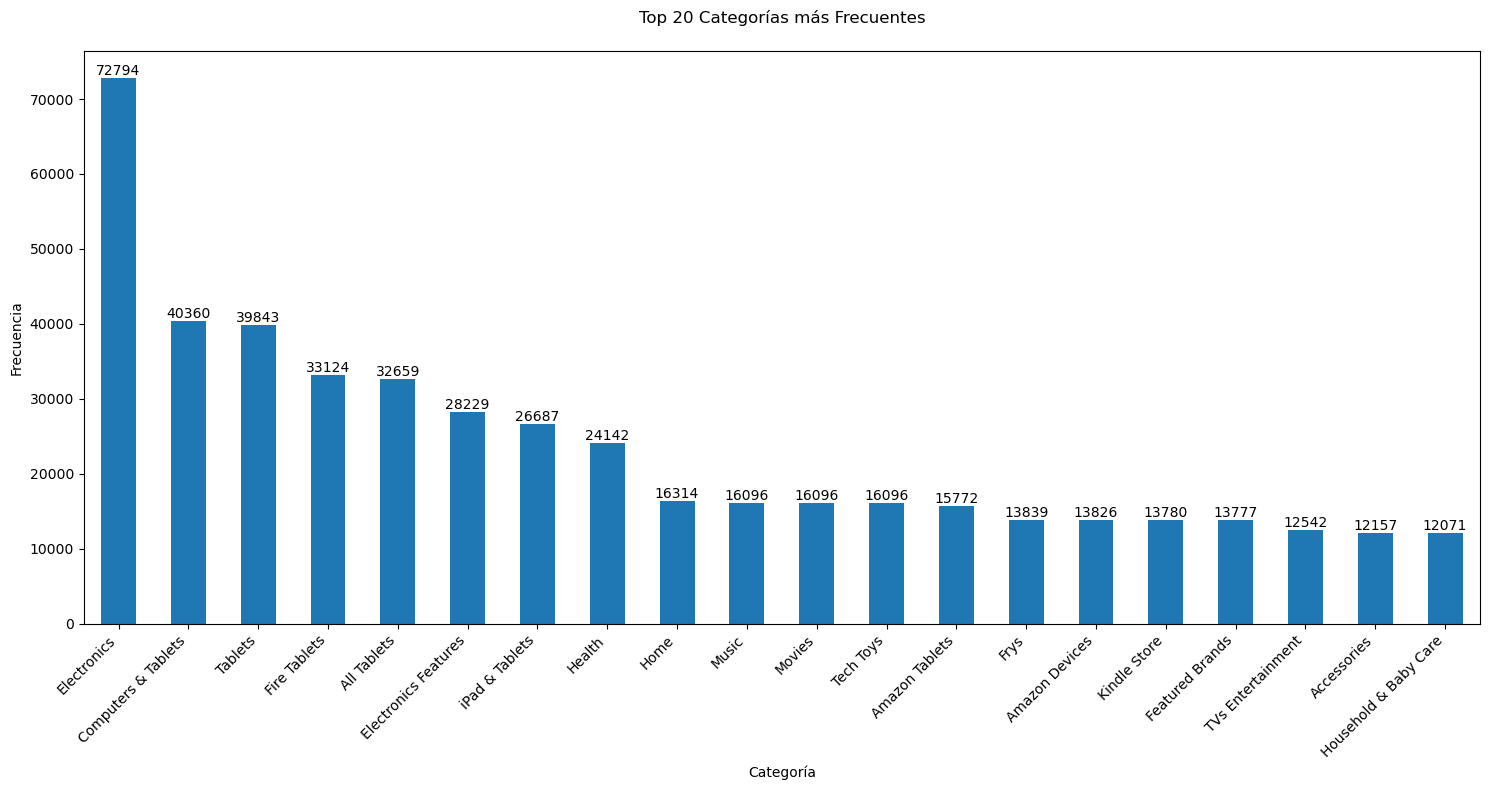

In [8]:
# Procesar categorías
def get_categories(cat_string):
    if pd.isna(cat_string):
        return []
    # Manejar diferentes formatos de separación
    if ',' in str(cat_string):
        return [c.strip() for c in str(cat_string).split(',')]
    elif '|' in str(cat_string):
        return [c.strip() for c in str(cat_string).split('|')]
    else:
        return [str(cat_string).strip()]

# Obtener todas las categorías únicas y contar frecuencias
all_categories = []
for cats in df['categories'].dropna():
    all_categories.extend(get_categories(cats))

# Crear DataFrame con conteos
category_counts = pd.Series(all_categories).value_counts()

# Visualizar top 20 categorías
plt.figure(figsize=(15, 8))
ax = category_counts.head(20).plot(kind='bar')
plt.title('Top 20 Categorías más Frecuentes', pad=20)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Mejorar formato de etiquetas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.head(20)):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

## 4. Análisis Temporal

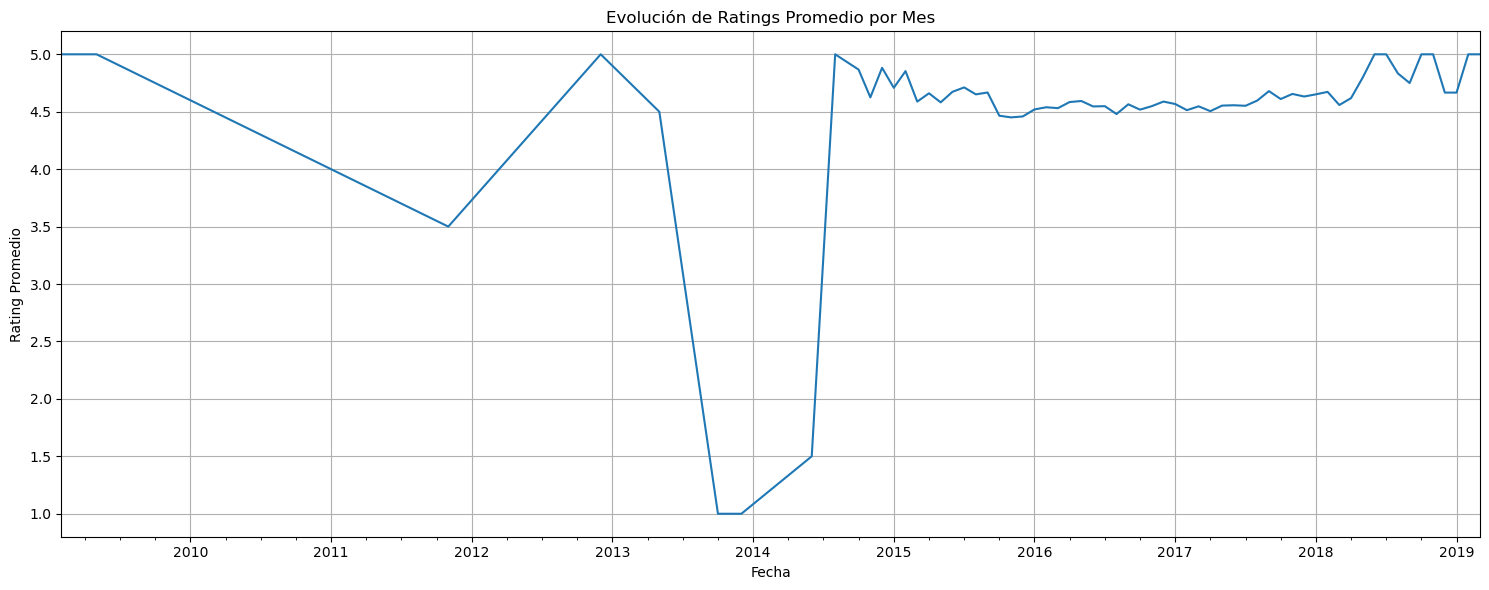

In [9]:
# Convertir a datetime si no lo está ya
df['reviews.date'] = pd.to_datetime(df['reviews.date'])

# Agregar por mes
monthly_ratings = df.groupby(df['reviews.date'].dt.to_period('M'))['reviews.rating'].mean()

# Visualizar tendencia temporal
plt.figure(figsize=(15, 6))
monthly_ratings.plot()
plt.title('Evolución de Ratings Promedio por Mes')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Análisis de Marcas

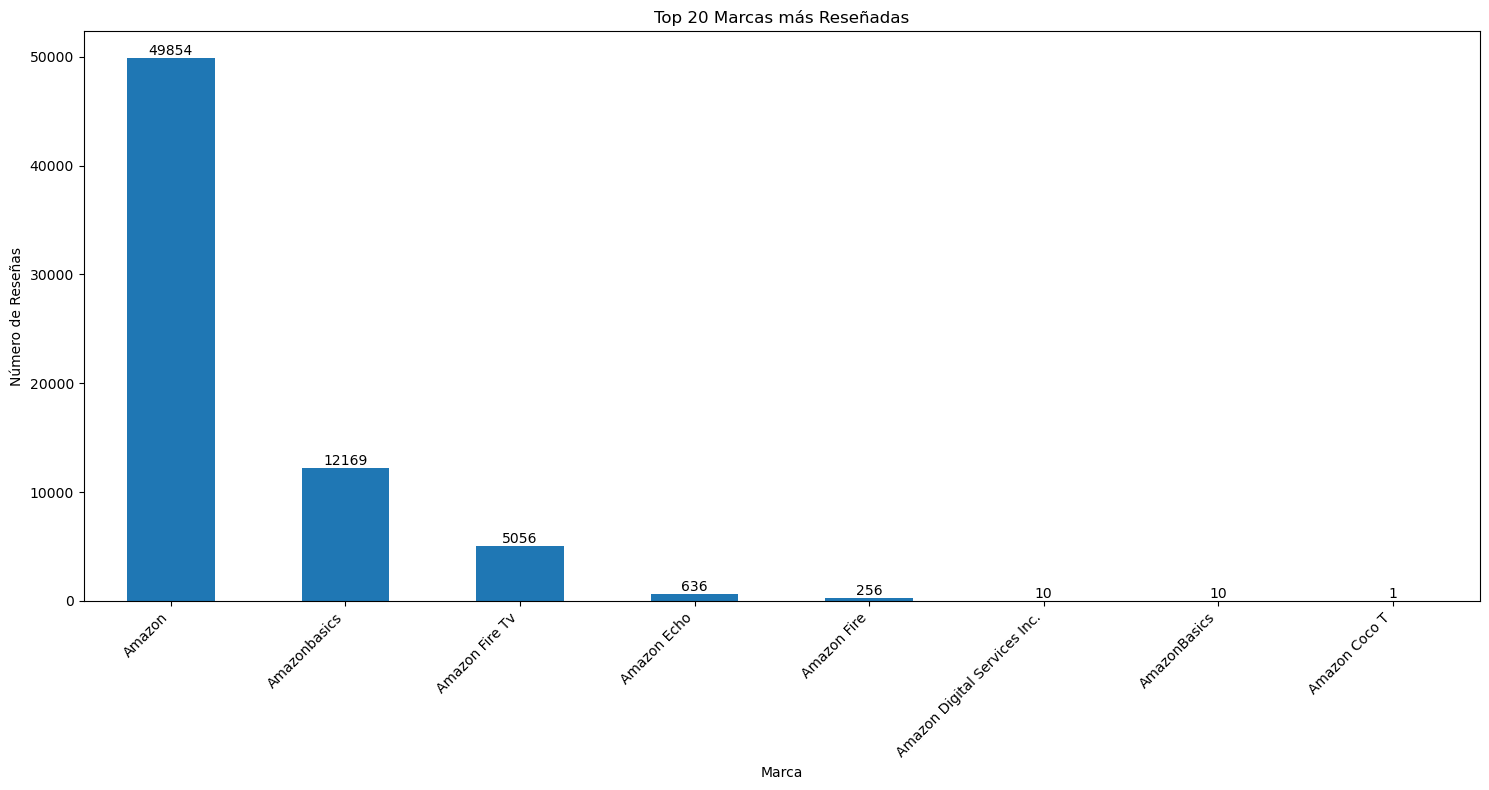

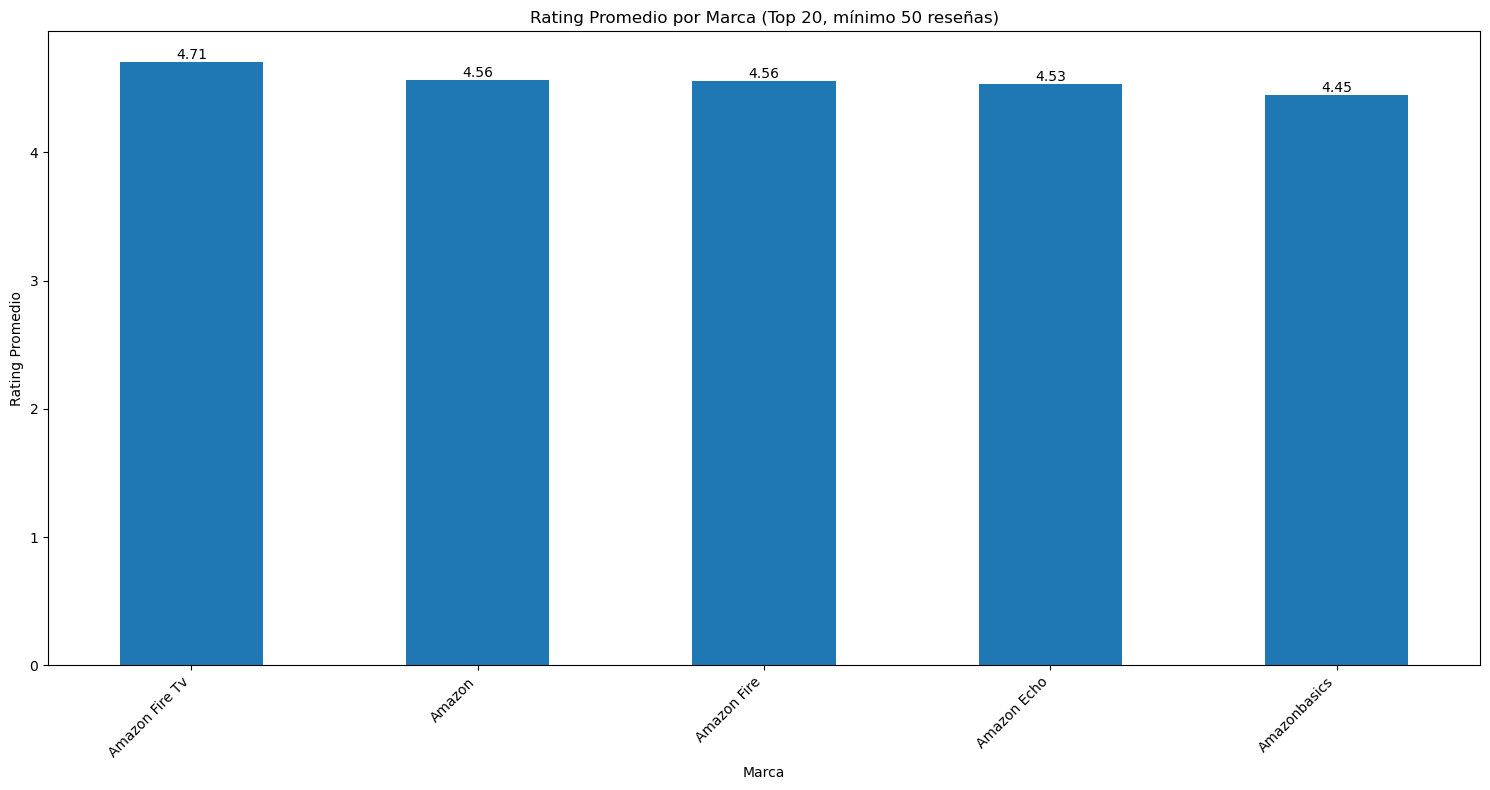

In [10]:
# Top marcas por número de reseñas
top_brands = df['brand'].value_counts().head(20)

plt.figure(figsize=(15, 8))
ax = top_brands.plot(kind='bar')
plt.title('Top 20 Marcas más Reseñadas')
plt.xlabel('Marca')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45, ha='right')

# Añadir valores sobre las barras
for i, v in enumerate(top_brands):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Rating promedio por marca (top 20)
brand_ratings = df.groupby('brand')['reviews.rating'].agg(['mean', 'count'])
brand_ratings = brand_ratings[brand_ratings['count'] >= 50].sort_values('mean', ascending=False)

plt.figure(figsize=(15, 8))
ax = brand_ratings.head(20)['mean'].plot(kind='bar')
plt.title('Rating Promedio por Marca (Top 20, mínimo 50 reseñas)')
plt.xlabel('Marca') 
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45, ha='right')

# Añadir valores sobre las barras
for i, v in enumerate(brand_ratings.head(20)['mean']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()